In [6]:
loc1 = 'REYK'
loc2 = 'HOFN'

<img src="Iceland.png">

This above image shows two locations from which GPS positioning data is collected from iceland. REYK.IGS08.tenv3 is the name of the file containg data from Reykjavik and HOFN.IGS08.tenv3 contains data data from a town called Höfn in the eastern part of the Island.

If you look at the three graphs you get after running the code in the next cell, you can see that both of those locations are gradually moving north and the elevation of both of these locations is staying relatively same. The graph that contains the "east positions" shows that the gps transmitter on Reykjavik is moving west (because it has a negative east displacement) and the gps transmittor on Höfn is moving east. This means that the island is slowly splitting apart. 

This data was collected from a geological data base and the link for which is available in the begining of the code. If you are curious you can graph data from any two locations by following these steps:

- Uncomment the block of code containing the lines "import urllib.request ....  +urlretrieve(temp_f2, fname2)"
- You have to install the library urllib3, you can do so by using the following line in your command line: "pip install urllib3"
- Then you can visit the website from the first line of code and get the four letter ID of the two locations you want to compare and replace the string in loc1 and loc2 with the id of those locations. 

I highly recommend checking out the other data because it is fascinating. If you check out the data from similar islands that are on opposite sides of the mid Atlantic ridge (like FLRS and PDEL), you can see how they are also slowly moving apart. This is hower not an integral part of the code and is purily optional. 

REYK
Time Span:  23.81 years
Number of days with data:  8690 days
Total north displacement:  50.5 cm
Total east displacement:  -26.12 cm
Total vertical displacement:  -3.889 cm
Average north displacement:  2.1 cm/year
Average east displacement:  -1.1 cm/year
Average vertical displacement:  -0.16 cm/year

HOFN
Time Span:  22.53 years
Number of days with data:  8222 days
Total north displacement:  33.04 cm
Total east displacement:  32.12 cm
Total vertical displacement:  31.15 cm
Average north displacement:  1.5 cm/year
Average east displacement:  1.4 cm/year
Average vertical displacement:  1.4 cm/year



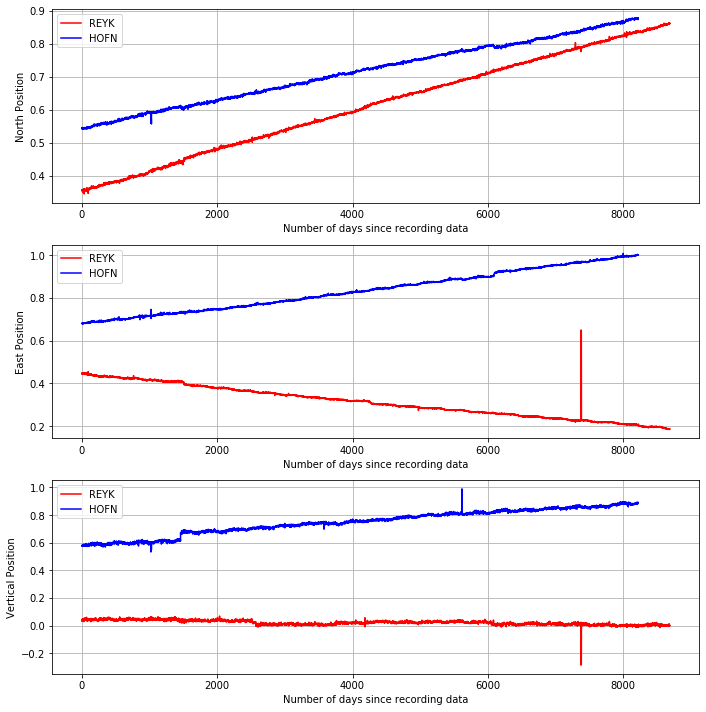

In [7]:
"""
https://sideshow.jpl.nasa.gov/post/series.html

This code extracts GPS data from two locations in iceland and creates three
subplots showing the north, east and vertical positions of the GPS device in these locations.

Yesh 9/3/2020
"""
import numpy as np
import matplotlib.pylab as plt

fname1 = loc1 + '.IGS08.tenv3'
fname2 = loc2 + '.IGS08.tenv3'

'''
import urllib.request
temp_f1 = "http://geodesy.unr.edu/gps_timeseries/tenv3/IGS14/" +loc1+ ".tenv3"
temp_f2 = "http://geodesy.unr.edu/gps_timeseries/tenv3/IGS14/" +loc2+ ".tenv3"
urllib.request.urlretrieve(temp_f1, fname1)
urllib.request.urlretrieve(temp_f2, fname2)
'''

dtype1 = np.dtype([('East position', 'f8')
, ('North position', 'f8'), ('Vertical position', 'f8')])


data_1 = np.loadtxt(fname1, dtype=dtype1, skiprows=1, usecols=(8,10,12))
data_2 = np.loadtxt(fname2, dtype=dtype1, skiprows=1, usecols=(8,10,12))



def getGPSstats(data):
    numberOfDays = len(data['East position'])
    totalTime = numberOfDays/365
    totalEastDisplacement = (data['East position'][-1] - data['East position'][0])*100
    totalNorthDisplacement = (data['North position'][-1] - data['North position'][0])*100
    totalVerticalDisplacement = (data['Vertical position'][-1] - data['Vertical position'][0])*100
    averageEastVelocity = totalEastDisplacement/totalTime
    averageNorthVelocity = totalNorthDisplacement/totalTime
    averageVerticalVelocity = totalVerticalDisplacement/totalTime
    
    print('Time Span: ','{:.4}'.format(totalTime),'years')
    print('Number of days with data: ',numberOfDays,'days')
    print('Total north displacement: ','{:.4}'.format(totalNorthDisplacement),'cm')
    print('Total east displacement: ','{:.4}'.format(totalEastDisplacement),'cm')
    print('Total vertical displacement: ','{:.4}'.format(totalVerticalDisplacement),'cm')
    print('Average north displacement: ','{:.2}'.format(averageNorthVelocity),'cm/year')
    print('Average east displacement: ','{:.2}'.format(averageEastVelocity),'cm/year')
    print('Average vertical displacement: ','{:.2}'.format(averageVerticalVelocity),'cm/year')
    print('')

print(loc1)
getGPSstats(data_1)
print(loc2)
getGPSstats(data_2)


dates1 = np.arange(0,len(data_1['East position']))
dates2 = np.arange(0,len(data_2['East position']))

fig = plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(3, 1, 1)
plt.plot(dates1,data_1['North position'], color = 'red', label = loc1)
plt.plot(dates2,data_2['North position'], color = 'blue', label = loc2)
plt.grid(True)
plt.xlabel('Number of days since recording data')
plt.ylabel('North Position')
plt.legend(loc="upper left")

plt.subplot(3, 1, 2)
plt.plot(dates1,data_1['East position'], color = 'red', label = loc1)
plt.plot(dates2,data_2['East position'], color = 'blue', label = loc2)
plt.grid(True)
plt.xlabel('Number of days since recording data')
plt.ylabel('East Position')
plt.legend(loc="upper left")

plt.subplot(3, 1, 3)
plt.plot(dates1,data_1['Vertical position'], color = 'red', label = loc1)
plt.plot(dates2,data_2['Vertical position'], color = 'blue', label = loc2)
plt.grid(True)
plt.xlabel('Number of days since recording data')
plt.ylabel('Vertical Position')
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


